# Exercice 2

In [1]:
import numpy as np
import pandas as pd
from keras.utils import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

import random
import os
import cv2

import seaborn as sns
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from keras import models, layers
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score

## Definition des constantes

In [2]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [3]:
DOGS_FILES_ROOT_DIR = "../../data/cats_dogs/"

In [4]:
filenames = os.listdir(DOGS_FILES_ROOT_DIR)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
    })

In [5]:
df.head()

,filename,category
0,cat.1.jpg,0
1,cat.10.jpg,0
2,cat.11.jpg,0
3,cat.12.jpg,0
4,cat.13.jpg,0


<Axes: xlabel='category'>

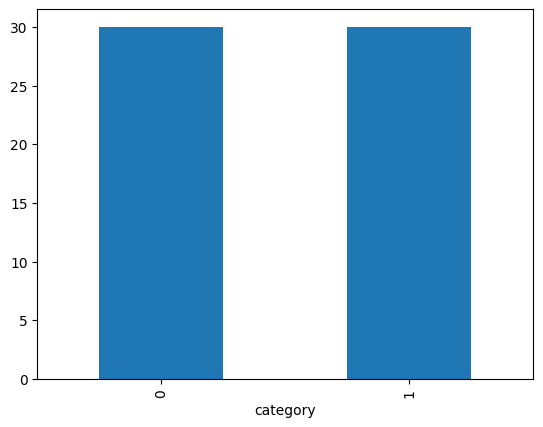

In [6]:
df['category'].value_counts().plot.bar()

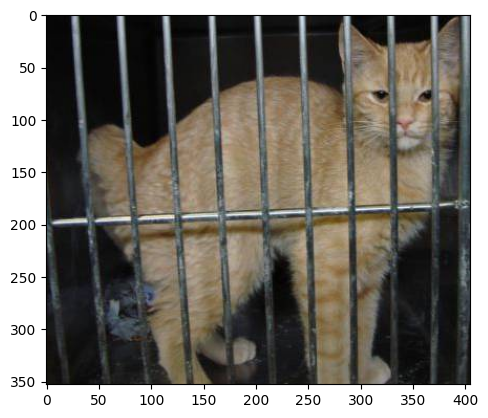

In [7]:
sample = random.choice(filenames)
image = load_img(DOGS_FILES_ROOT_DIR + sample)
plt.imshow(image)

# Création du modèle

Nous définissons l'architecture du CNN comme suit:
Soit une image de dimension IMAGE_SIZE
Une premiere couche composer de 32 filtres de taille 3 * 3, de maxpoling de taille 2 * 2, une dropout de 0.25 et une fonction d'actvation relu.

Une premiere couche composer de 70 filtres de taille 3 * 3, de maxpoling de taille 2 * 2, une dropout de 0.25 et une fonction d'actvation relu.

Une premiere couche composer de 128 filtres de taille 3 * 3, de maxpoling de taille 2 * 2, une dropout de 0.25 et une fonction d'actvation relu.

Une premiere couche composer de 512 filtres de taille 3 * 3, de maxpoling de taille 2 * 2, une dropout de 0.25 et une fonction d'actvation relu.

Une premiere couche composer de 512 filtres de taille 3 * 3, de maxpoling de taille 2 * 2, une dropout de 0.25 et une fonction d'actvation relu.

Une couche de  sortie avec  fonction d'actvation softmax.


In [9]:
# Implémenter votre code
IMAGE_SIZE = (128, 128, 3)  # Exemple
NB_CLASSES = 10  # À adapter selon votre cas

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=IMAGE_SIZE),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(70, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(NB_CLASSES, activation='softmax')
])

model.summary()
#model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

c:\Users\Admin\Documents\DIT Courses\DL\exam\projet-deeplearning\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 70)     │        20,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 70)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 70)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        80,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,072,528 (11.72 MB)

 Trainable params: 3,072,528 (11.72 MB)

 Non-trainable params: 0 (0.00 B)

### Questions

Question 1 : Quelle est le type de cette classification?\
Question 2 : Implémenter le réseau convolutif\
Question 3 : Calculer le nombres de paramètres\
Question 4 : Quel rôle joue la méthode dropout dans un réseau de neurone convolitif\

In [10]:
model.count_params()

3072528

### Reponses

[ ] -1 Classification binaire